# Proyek Pertama: Membuat NLP dengan Tensorflow
- Nama: Rayhan Ananda Resky
- Email: rayhanananda2002@gmail.com
- Id Dicoding: rayhanananda


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/tweets.csv')
df = df.drop(columns=(['id', 'location', 'keyword']))
df

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
df.info('all')
print(df.isna().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11370 non-null  object
 1   target  11370 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 177.8+ KB
text      0
target    0
dtype: int64
145


In [ ]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [ ]:
kelas = pd.get_dummies(df.target)
df = pd.concat([df, kelas],axis=1)
df = df.drop(columns='target')
df

,text,0,1
0,"Communal violence in Bhainsa, Telangana. ""Ston...",0,1
1,Telangana: Section 144 has been imposed in Bha...,0,1
2,Arsonist sets cars ablaze at dealership https:...,0,1
3,Arsonist sets cars ablaze at dealership https:...,0,1
4,"""Lord Jesus, your love brings freedom and pard...",1,0
...,...,...,...
11365,Media should have warned us well in advance. T...,1,0
11366,i feel directly attacked 💀 i consider moonbin ...,1,0
11367,i feel directly attacked 💀 i consider moonbin ...,1,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",1,0


In [ ]:
teks = df['text'].values
label = df.drop(columns='text').values

In [ ]:
print(label)
print(teks)

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'
 'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…'
 'Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI' ...
 'i feel directly attacked 💀 i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this https://t.co/psLBecS7hI'
 'ok who remember "outcast" nd the "dora" au?? THOSE AU WRECKED OUR NERVES ND BRAINCELLS JDKSHSSJHS LEGENDS'
 'Jake Corway wrecked while running 14th at IRP.']


In [ ]:
from sklearn.model_selection import train_test_split

teks_latih, teks_uji, label_latih, label_uji = train_test_split(teks, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=7000, oov_token='x')
tokenizer.fit_on_texts(teks_latih)
tokenizer.fit_on_texts(teks_uji)

sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_uji = tokenizer.texts_to_sequences(teks_uji)

padded_latih = pad_sequences(sekuens_latih)
padded_uji = pad_sequences(sekuens_uji)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=7000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          112000    
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 139258 (543.98 KB)
Trainable params: 13925

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') >= 0.9 ):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(padded_latih, label_latih, epochs=30,
                    batch_size=64, validation_data=(padded_uji, label_uji),
                    callbacks=[callbacks])

Epoch 1/30
141/141 [==============================] - 17s 63ms/step - loss: 0.4360 - accuracy: 0.8303 - val_loss: 0.3430 - val_accuracy: 0.8690
Epoch 2/30
141/141 [==============================] - 5s 34ms/step - loss: 0.2305 - accuracy: 0.9138 - val_loss: 0.3220 - val_accuracy: 0.8882
Epoch 3/30
141/141 [==============================] - 5s 36ms/step - loss: 0.1512 - accuracy: 0.9464 - val_loss: 0.3229 - val_accuracy: 0.8837
Epoch 4/30
141/141 [==============================] - 6s 43ms/step - loss: 0.1019 - accuracy: 0.9651 - val_loss: 0.4046 - val_accuracy: 0.8713
Epoch 5/30
141/141 [==============================] - 4s 31ms/step - loss: 0.0738 - accuracy: 0.9749 - val_loss: 0.4298 - val_accuracy: 0.8731
Epoch 6/30
141/141 [==============================] - 4s 32ms/step - loss: 0.0512 - accuracy: 0.9826 - val_loss: 0.5858 - val_accuracy: 0.8726
Epoch 7/30
141/141 [==============================] - 6s 40ms/step - loss: 0.0420 - accuracy: 0.9854 - val_loss: 0.6620 - val_accuracy: 0.872

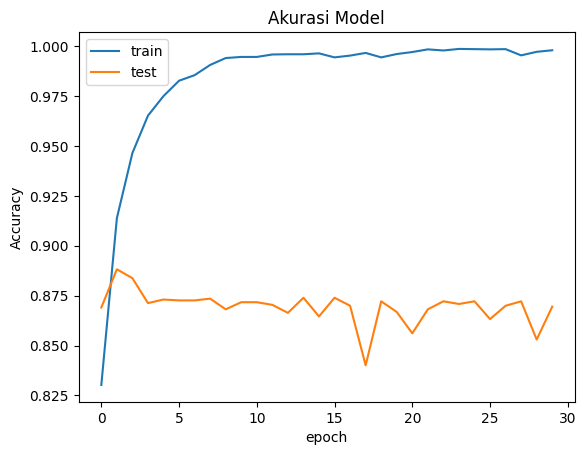

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

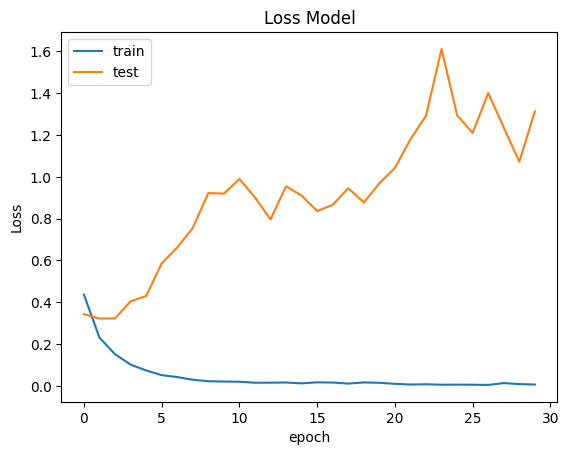

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()